In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-05 04:10:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   194MB/s    in 0.3s    

2023-11-05 04:10:57 (194 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import zipfile

#Unzip the aarchive
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
#Print the contents of the directories
import os
base_dir = '/content/cats_and_dogs_filtered'

print('Contents of base directory:')
print(os.listdir(base_dir))

print('\nContents of train directory:')
print(os.listdir(f'{base_dir}/train'))

print('\nContents of validation directory:')
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'vectorize.py', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [ ]:
#Setup th directories as variables so we can point generators at them
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with training cat/dog pictures
train_cats_dir =  os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory with validataion cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
#Now, that we have the directories as variables, we can pass them to the os.listdir to take the files from those directories, and load them into Python lists.
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.664.jpg', 'cat.17.jpg', 'cat.174.jpg', 'cat.807.jpg', 'cat.379.jpg', 'cat.315.jpg', 'cat.860.jpg', 'cat.558.jpg', 'cat.933.jpg', 'cat.631.jpg']
['dog.42.jpg', 'dog.162.jpg', 'dog.123.jpg', 'dog.575.jpg', 'dog.715.jpg', 'dog.701.jpg', 'dog.181.jpg', 'dog.632.jpg', 'dog.28.jpg', 'dog.892.jpg']


In [ ]:
#Lets find out the total number of cat and dogs images in the train and validation directories
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))

print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Parameters for our graph; we will output images in a 4x4 configuration
nrows = 4
ncols = 4

#Index for iterating
pic_index = 0

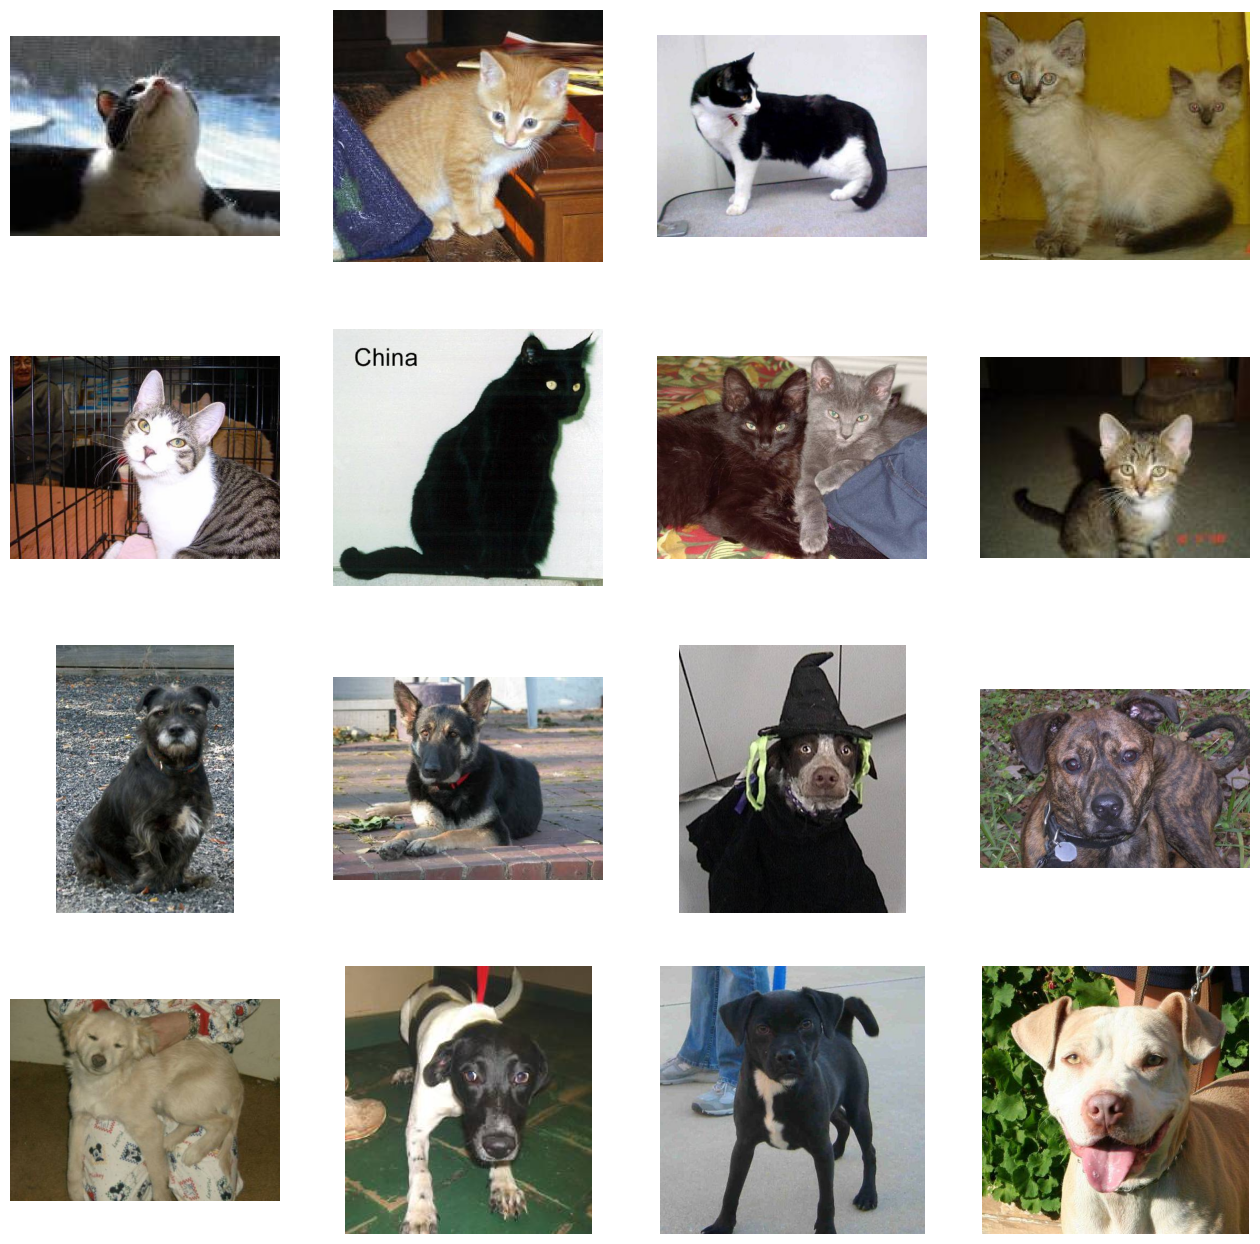

In [ ]:
#Now display a batch of 8 cat and dog pictures. You can re-run the cell to see a fresh batach of each time

#Set up matplotlib fig and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cats_fnames[pic_index -8 : pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
               for fname in train_dogs_fnames[pic_index -8 : pic_index]
               ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  #set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)

  #Do not show axis or gridlines
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
#Now lets build the model

model = tf.keras.models.Sequential([
    #Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf. keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf. keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf. keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),

    #Only 1 output neuron. It will contain a value from o or 1, where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
#Compile the model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from PIL import Image
#Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

#Flow images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

In [ ]:
history = model.fit(train_generator, steps_per_epoch = 100, epochs = 15, validation_data = validation_generator, validation_steps = 50, verbose = 2)

In [ ]:
def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [ ]:
# Create new model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
EPOCHS = 100


model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 124s - loss: 0.6897 - accuracy: 0.5285 - val_loss: 0.6776 - val_accuracy: 0.5520 - 124s/epoch - 1s/step
Epoch 2/100
100/100 - 121s - loss: 0.6765 - accuracy: 0.5685 - val_loss: 0.6702 - val_accuracy: 0.5540 - 121s/epoch - 1s/step
Epoch 3/100
100/100 - 113s - loss: 0.6731 - accuracy: 0.5775 - val_loss: 0.6504 - val_accuracy: 0.6320 - 113s/epoch - 1s/step
Epoch 4/100
100/100 - 121s - loss: 0.6602 - accuracy: 0.5960 - val_loss: 0.6469 - val_accuracy: 0.6090 - 121s/epoch - 1s/step
Epoch 5/100
100/100 - 122s - loss: 0.6446 - accuracy: 0.6315 - val_loss: 0.6204 - val_accuracy: 0.6540 - 122s/epoch - 1s/step
Epoch 6/100
100/100 - 121s - loss: 0.6359 - accuracy: 0.6385 - val_loss: 0.6336 - val_accuracy: 0.6160 - 121s/epoch - 1s/step
Epoch 7/100
100/100 - 119s - loss: 0.6228 - accuracy: 0.6380 - val_loss: 0.5942 - val_accuracy: 0.6750 - 119s/epoch - 1s/step
Epoch 8/100
100/100 - 120s - loss:

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy', color='red')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss', color='red')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

<ipython-input-59-08b2c19f518e>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Training accuracy', color='red')
<ipython-input-59-08b2c19f518e>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training Loss', color='red')


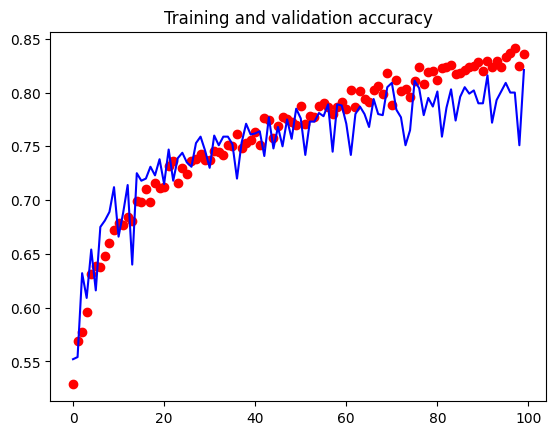

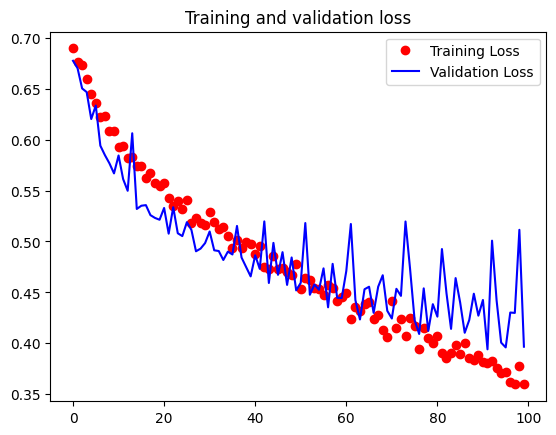

In [ ]:
plot_loss_acc(history)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded  = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size = (150, 150))

  x =  image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model_for_aug.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0] > 0.5:
    print(fn + ' is a dog')
  else:
    print(fn + ' is a cat')

Saving cat_00044.jpg to cat_00044.jpg
Saving cat_00051.jpg to cat_00051.jpg
Saving cat_00062.jpg to cat_00062.jpg
Saving cat_00071.jpg to cat_00071.jpg
Saving cat_00244.jpg to cat_00244.jpg
Saving dog_00070.jpg to dog_00070.jpg
Saving dog_00071.jpg to dog_00071.jpg
Saving dog_00102.jpg to dog_00102.jpg
Saving dog_00108.jpg to dog_00108.jpg
Saving dog_00156.jpg to dog_00156.jpg
1/1 [==============================] - 0s 33ms/step
[0.02577298]
cat_00044.jpg is a cat
1/1 [==============================] - 0s 29ms/step
[0.14726956]
cat_00051.jpg is a cat
1/1 [==============================] - 0s 33ms/step
[0.06867132]
cat_00062.jpg is a cat
1/1 [==============================] - 0s 34ms/step
[0.22296883]
cat_00071.jpg is a cat
1/1 [==============================] - 0s 37ms/step
[0.01347817]
cat_00244.jpg is a cat
1/1 [==============================] - 0s 34ms/step
[0.9999918]
dog_00070.jpg is a dog
1/1 [==============================] - 0s 34ms/step
[0.97237325]
dog_00071.jpg is a dog
1/1 [

In [ ]:
import random
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

1/1 [==============================] - 0s 111ms/step


<ipython-input-21-281046ae5a02>:37: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


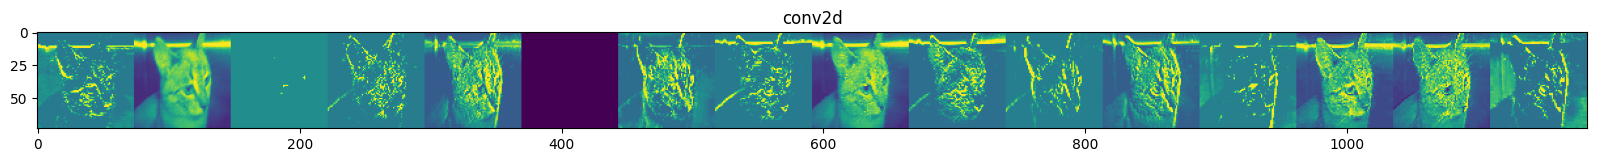

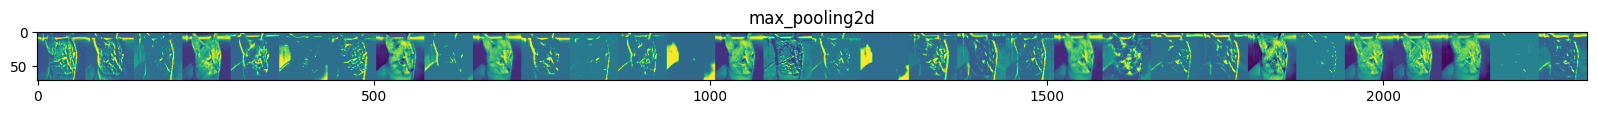

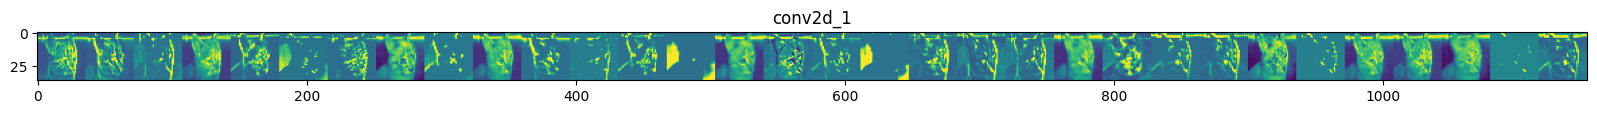

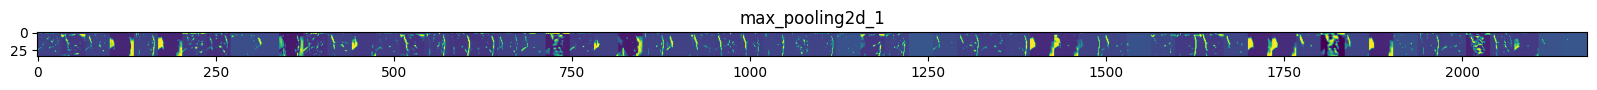

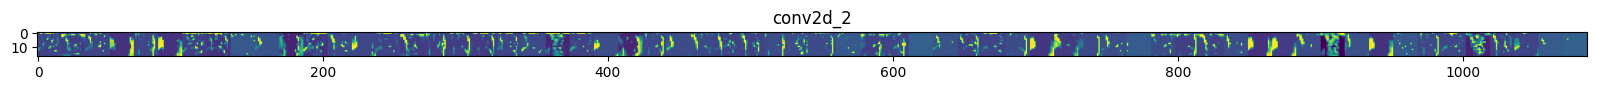

In [ ]:
from tensorflow.python import train
#Define a new model that will take the an image as input and will output the intermediate representataions for all the layers in the previous model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

#Prepare a random input image from the training set
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size = (150,  150))                             #This is a PIL image
x = img_to_array(img)                                                           #Numpy array with shape (150, 150, 3)
x = x.reshape((1, ) + x.shape)                                                  #Numpy array with shape (1, 150, 50, 3)

#Scale the images by 1/255
x /= 255.0

#Run the image through the network, thus obtaining all intermdiate representations for this image
successive_feature_maps = visualization_model.predict(x)

#These are the names of the layers , so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

#Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    #Just do this for the conv/maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]                                          #number of features in the feature map
    size = feature_map.shape[1]                                                 #feature map shape (1, size, size, n_features)

    #Title the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #Postprocess the feature to be visually palatable
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x                            #Tile each filter into a horizontal grid

    #Display the grid
    scale = 20. / n_features
    plt.figure(figsize = (scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')
